In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame

In [66]:
df = pd.read_csv('alternative.csv')
df.head()

,alt,c1,c2,c3,c4,c5
0,A1,2,7000000,2012,7,3
1,A2,2,10000000,2015,2,3
2,A3,3,8500000,2010,4,4


# Method

In [67]:
def calculate_wsm(row):
    return sum(row[x] * (weight[x] / 100) for x in benefit_attr + cost_attr)

def calculate_wpm(row):
    res = 1
    for col in benefit_attr + cost_attr:
        res = row[col] ** (weight[col] / 100)
    return res


def update_score(data):
    c2_conditions = [
        (data['c2'] >= 10000000),
        ((data['c2'] >= 5000000) & (data['c2'] < 10000000)),
        ((data['c2'] >= 1000000) & (data['c2'] < 5000000))
    ]

    c2_scores = [1, 2, 3]  # Corresponding scores for 'c2' conditions

    c3_conditions = [
        (data['c3'] >= 2015),
        ((data['c3'] >= 2010) & (data['c3'] < 2015)),
        ((data['c3'] >= 2005) & (data['c3'] < 2010))
    ]

    c3_scores = [3, 2, 1]  # Corresponding scores for 'c3' conditions

    # Apply conditions and update 'c2' and 'c3' columns
    data['c2'] = pd.Series(np.select(c2_conditions, c2_scores), name='c2')
    data['c3'] = pd.Series(np.select(c3_conditions, c3_scores), name='c3')

    return data

In [68]:
df = update_score(df)
df.head()

,alt,c1,c2,c3,c4,c5
0,A1,2,2,2,7,3
1,A2,2,1,3,2,3
2,A3,3,2,2,4,4


# Score

In [69]:
weight = {
    'c1': 30,
    'c2': 20,
    'c3': 20,
    'c4': 20,
    'c5': 10
}

benefit_attr = ['c1', 'c3', 'c5']
cost_attr = ['c2', 'c4']

In [70]:
for attr in benefit_attr:
    max_val = df[attr].max()
    df[attr] = df[attr] / max_val

for attr in cost_attr:
    min_val = df[attr].min()
    df[attr] = min_val / df[attr]

In [71]:
df.head()

,alt,c1,c2,c3,c4,c5
0,A1,0.666667,0.5,0.666667,0.285714,0.75
1,A2,0.666667,1.0,1.000000,1.000000,0.75
2,A3,1.000000,0.5,0.666667,0.500000,1.00


# Method

In [72]:
df['WSM'] = df.apply(calculate_wsm, axis=1)
df['WPM'] = df.apply(calculate_wpm, axis=1)

In [73]:
df.head()

,alt,c1,c2,c3,c4,c5,WSM,WPM
0,A1,0.666667,0.5,0.666667,0.285714,0.75,0.565476,0.778371
1,A2,0.666667,1.0,1.000000,1.000000,0.75,0.875000,1.000000
2,A3,1.000000,0.5,0.666667,0.500000,1.00,0.733333,0.870551


In [75]:
best_wsm = df['WSM'].max()
best_wpm = df['WPM'].max()

best_alternatives_wsm = df[df['WSM'] == best_wsm]['alt'].values
best_alternatives_wpm = df[df['WPM'] == best_wpm]['alt'].values

print("Hasil WSM:")
print(f"Alternatif terbaik berdasarkan WSM: {', '.join(best_alternatives_wsm)}")
print("Nilai WSM terbaik:", best_wsm)

print("\nHasil WPM:")
print(f"Alternatif terbaik berdasarkan WPM: {', '.join(best_alternatives_wpm)}")
print("Nilai WPM terbaik:", best_wpm)

Hasil WSM:
Alternatif terbaik berdasarkan WSM: A2
Nilai WSM terbaik: 0.875

Hasil WPM:
Alternatif terbaik berdasarkan WPM: A2
Nilai WPM terbaik: 1.0


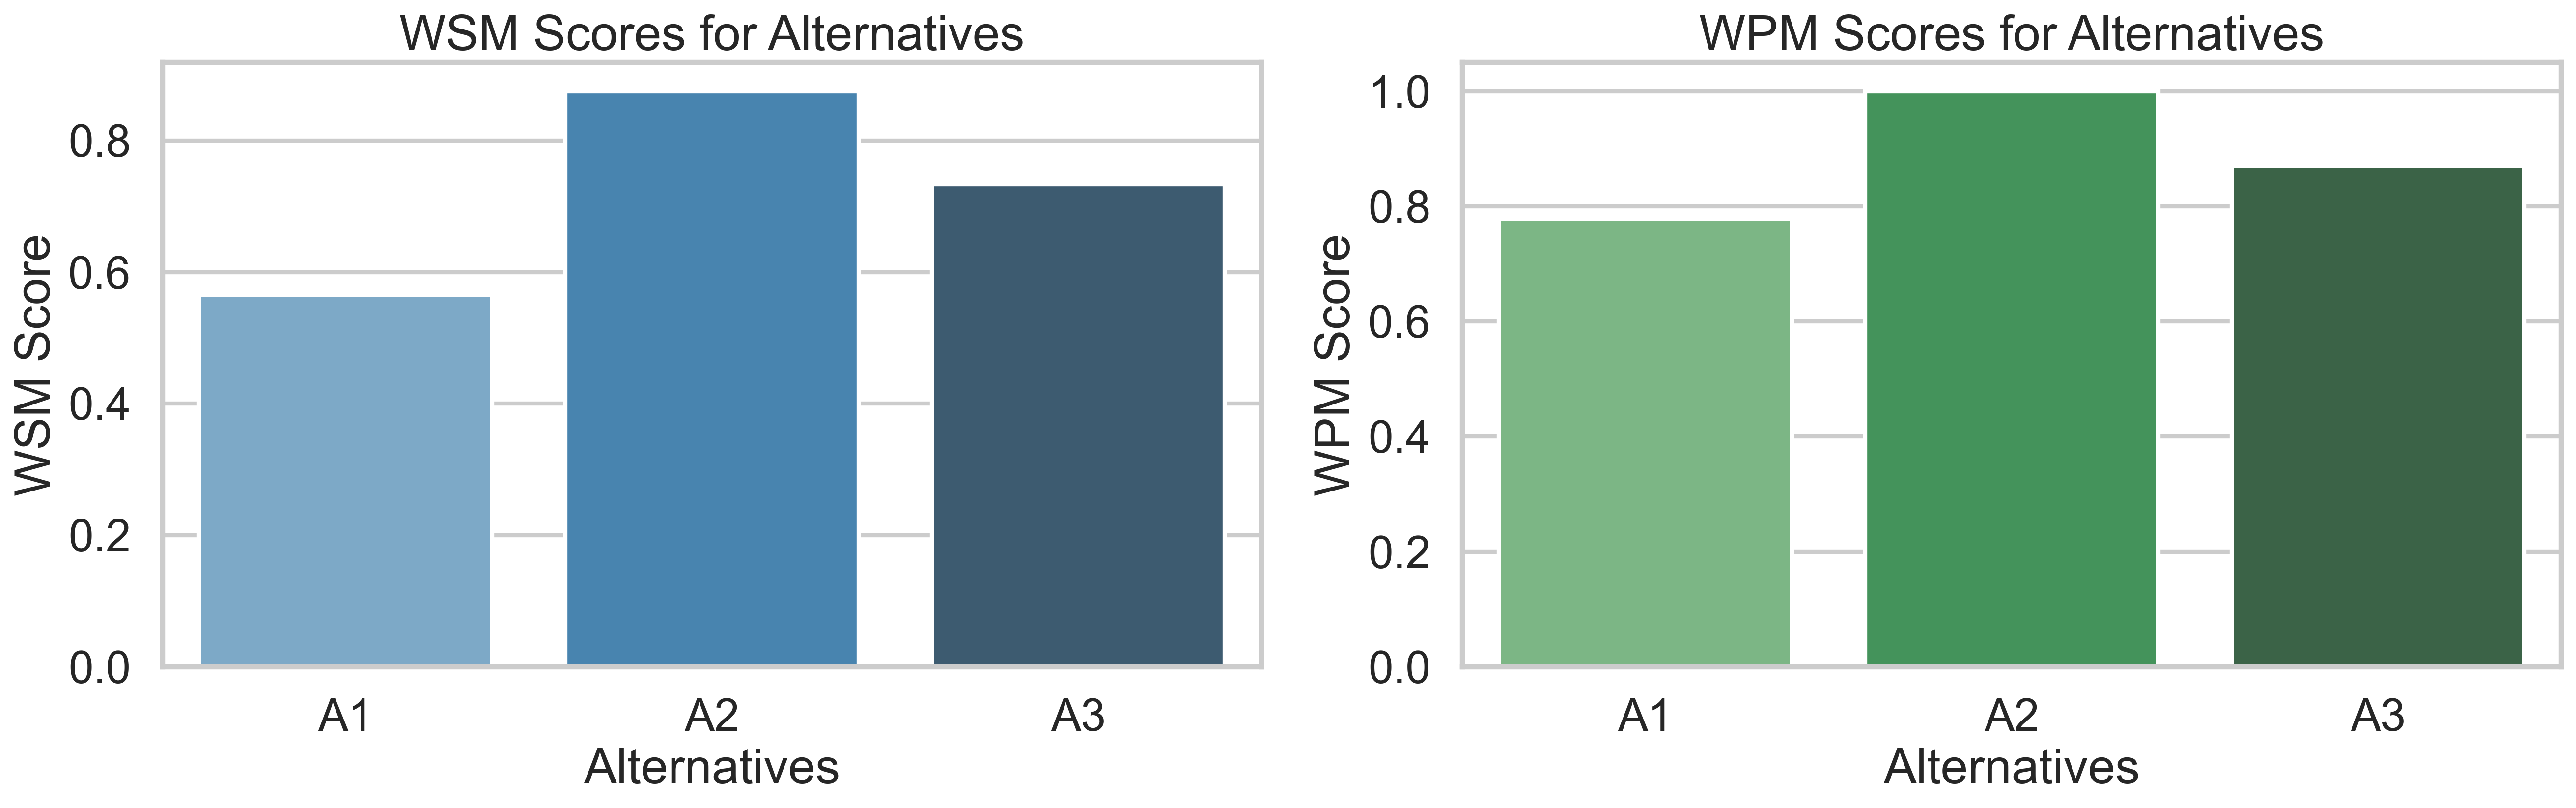

In [76]:
sns.set(style="whitegrid")
sns.set_context("poster")
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=300)

# Plot WSM Scores
sns.barplot(x='alt', y='WSM', data=df, ax=axes[0], palette="Blues_d")
axes[0].set_title('WSM Scores for Alternatives')
axes[0].set_xlabel('Alternatives')
axes[0].set_ylabel('WSM Score')

# Plot WPM Scores
sns.barplot(x='alt', y='WPM', data=df, ax=axes[1], palette="Greens_d")
axes[1].set_title('WPM Scores for Alternatives')
axes[1].set_xlabel('Alternatives')
axes[1].set_ylabel('WPM Score')

plt.tight_layout()
plt.savefig('decision_scores.png', dpi=300)
plt.show()

# Neural Network

In [78]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model

In [80]:
data = pd.read_csv('alternative.csv')
data.head()

,alt,c1,c2,c3,c4,c5
0,A1,2,7000000,2012,7,3
1,A2,2,10000000,2015,2,3
2,A3,3,8500000,2010,4,4


In [81]:
X = data[['c1', 'c2', 'c3', 'c4', 'c5']].values
y = data['alt'].values

In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [83]:
data.head()

,alt,c1,c2,c3,c4,c5
0,A1,2,7000000,2012,7,3
1,A2,2,10000000,2015,2,3
2,A3,3,8500000,2010,4,4


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
num_alternatives = len(data['alt'].unique())

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_alternatives)
])

plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3851258167296.0000 - val_loss: 2713997541376.0000
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 6639159083008.0000 - val_loss: 2573888126976.0000
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 6080850034688.0000 - val_loss: 2413151125504.0000
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 2361852166144.0000 - val_loss: 2258866798592.0000
Epoch 5/100
1/1 [==============================] - 0s 29ms/step - loss: 7056359161856.0000 - val_loss: 2105149358080.0000
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 1824901955584.0000 - val_loss: 1970642485248.0000
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 2969943408640.0000 - val_loss: 1850905329664.0000
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 5253244649472.0000 - val_loss: 1730149744640.0000
Epoch 9/100
1/1 [=========

In [89]:
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")

# Make Decisions
new_data = np.array([[2, 7000000, 2012, 7, 3]])
new_data_scaled = scaler.transform(new_data)

scores = model.predict(new_data_scaled)
best_alternative_index = np.argmax(scores)
best_alternative = label_encoder.inverse_transform([best_alternative_index])[0]

print(f"The best alternative is: {best_alternative}")

1/1 [==============================] - 0s 41ms/step - loss: 0.0228
Test Loss: 0.0228
1/1 [==============================] - 0s 26ms/step
The best alternative is: A3


In [90]:
data = pd.DataFrame({
    'c1': [2, 4, 3],
    'c2': [7000000, 10000000, 8500000],
    'c3': [2012, 2015, 2010],
    'c4': [7, 2, 4],
    'c5': [3, 4, 4]
})

# Separate features (X) from the data
X_data = data[['c1', 'c2', 'c3', 'c4', 'c5']].values

# Load the scaler used during training
scaler = MinMaxScaler()
scaler.fit(X_train)  # Assuming X_train is the training data used for scaling

# Scale the input features for prediction
X_data_scaled = scaler.transform(X_data)

# Make predictions for the alternatives
alternative_scores = model.predict(X_data_scaled)

# Get the best alternative for each prediction
best_alternatives_indices = np.argmax(alternative_scores, axis=1)
alternatives = np.array(['A1', 'A2', 'A3'])

# Check if the indices are within bounds
best_alternatives_indices = np.clip(best_alternatives_indices, 0, len(alternatives) - 1)

# Print the best alternatives for each prediction
for i, alternative_index in enumerate(best_alternatives_indices):
    best_alternative = alternatives[alternative_index]
    print(f"Prediction {i + 1}: Best Alternative is {best_alternative}")

1/1 [==============================] - 0s 95ms/step
Prediction 1: Best Alternative is A3
Prediction 2: Best Alternative is A1
Prediction 3: Best Alternative is A1
